In [48]:
import numpy as np
import pandas as pd
import nltk 
import seaborn as sns 
import matplotlib.pyplot as plt 
from transformers import BertModel
# Load the CSV back into a new DataFrame (for later use)
df = pd.read_csv(r'C:\Users\Sahan\Documents\Phase_4_Project\CSV\US_Hotels.csv')


In [49]:
df

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Description,HotelFacilities,PinCode
0,US,United States,100328,"Abbeville, Louisiana",1094195,Sunbelt Lodge Motel,TwoStar,1903 Veterans Memorial Drive AbbevilleLouisian...,Sunbelt Lodge Motel is a 2-star property situa...,shared lounge/TV area meeting/banquet faciliti...,LA 70510
1,US,United States,100328,"Abbeville, Louisiana",1125999,Budget Inn & Suites,TwoStar,2115 Charity Street AbbevilleLouisiana 70510,Offering a free continental breakfast and an o...,24-hour front desk Non-smoking rooms Laundry F...,LA 70510
2,US,United States,100328,"Abbeville, Louisiana",1179258,Best Western Abbeville Inn & Suites,TwoStar,3515 Veterans Memorial Dr Abbeville AbbevilleL...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) V...,70510
3,US,United States,100328,"Abbeville, Louisiana",1250024,Motel 6 Abbeville LA,TwoStar,3523 Veterans Memorial Drive AbbevilleLouisian...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) W...,70510
4,US,United States,100328,"Abbeville, Louisiana",1366117,Days Inn by Wyndham Abbeville,TwoStar,730 Veterans Memorial Dr AbbevilleLouisiana 70...,<p>HeadLine : Near Abbeville General Hospital<...,Express check-out Multilingual staff 24-hour f...,70510
...,...,...,...,...,...,...,...,...,...,...,...
137943,US,United States,143364,"Zion, Illinois",1226889,Country Inn & Suites by Radisson Zion IL,TwoStar,1100 33Rd Street Zion 60099 ZionIllinois 60099,<p>HeadLine : Near Illinois Beach State Park</...,Dry cleaning/laundry service Wheelchair access...,60099
137944,US,United States,143364,"Zion, Illinois",1365443,The Inn at Market Square,ThreeStar,2723 Sheridan Road ZionIllinois 60099,<p>HeadLine : Near Cancer Treatment Centers of...,Gift shops or newsstand Shopping on site Propo...,60099
137945,US,United States,142951,"Zion Crossroads, Virginia",1228497,Best Western Plus Crossroads Inn & Suites,TwoStar,135 Wood Ridge Ter Zion Crossroads Zion Crossr...,<p>HeadLine : Near Spring Creek Golf Club</p><...,Daily Safe-deposit box at front desk Smoke-fre...,22942
137946,US,United States,143934,"Zion National Park, Utah",1184658,Zion Ponderosa Ranch Resort,TwoStar,Twin Knolls Road Zion National Park Orderville...,<p>HeadLine : Near Clear Creek Overlook</p><p>...,Mountain biking on site ATM/banking Terrace Zi...,84755


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137948 entries, 0 to 137947
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   countyCode       137948 non-null  object
 1   countyName       137948 non-null  object
 2   cityCode         137948 non-null  int64 
 3   cityName         137948 non-null  object
 4   HotelCode        137948 non-null  int64 
 5   HotelName        137948 non-null  object
 6   HotelRating      137948 non-null  object
 7   Address          137948 non-null  object
 8   Description      137948 non-null  object
 9   HotelFacilities  137948 non-null  object
 10  PinCode          137948 non-null  object
dtypes: int64(2), object(9)
memory usage: 11.6+ MB


In [51]:



df = df.drop(columns=['countyCode', 'countyName', 'PinCode', 'HotelCode'])



print(df.head())


   cityCode                cityName                            HotelName  \
0    100328  Abbeville,   Louisiana                  Sunbelt Lodge Motel   
1    100328  Abbeville,   Louisiana                  Budget Inn & Suites   
2    100328  Abbeville,   Louisiana  Best Western Abbeville Inn & Suites   
3    100328  Abbeville,   Louisiana                 Motel 6 Abbeville LA   
4    100328  Abbeville,   Louisiana        Days Inn by Wyndham Abbeville   

  HotelRating                                            Address  \
0     TwoStar  1903 Veterans Memorial Drive AbbevilleLouisian...   
1     TwoStar      2115 Charity Street AbbevilleLouisiana 70510    
2     TwoStar  3515 Veterans Memorial Dr Abbeville AbbevilleL...   
3     TwoStar  3523 Veterans Memorial Drive AbbevilleLouisian...   
4     TwoStar  730 Veterans Memorial Dr AbbevilleLouisiana 70...   

                                         Description  \
0  Sunbelt Lodge Motel is a 2-star property situa...   
1  Offering a free con

In [52]:
df

,cityCode,cityName,HotelName,HotelRating,Address,Description,HotelFacilities
0,100328,"Abbeville, Louisiana",Sunbelt Lodge Motel,TwoStar,1903 Veterans Memorial Drive AbbevilleLouisian...,Sunbelt Lodge Motel is a 2-star property situa...,shared lounge/TV area meeting/banquet faciliti...
1,100328,"Abbeville, Louisiana",Budget Inn & Suites,TwoStar,2115 Charity Street AbbevilleLouisiana 70510,Offering a free continental breakfast and an o...,24-hour front desk Non-smoking rooms Laundry F...
2,100328,"Abbeville, Louisiana",Best Western Abbeville Inn & Suites,TwoStar,3515 Veterans Memorial Dr Abbeville AbbevilleL...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) V...
3,100328,"Abbeville, Louisiana",Motel 6 Abbeville LA,TwoStar,3523 Veterans Memorial Drive AbbevilleLouisian...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) W...
4,100328,"Abbeville, Louisiana",Days Inn by Wyndham Abbeville,TwoStar,730 Veterans Memorial Dr AbbevilleLouisiana 70...,<p>HeadLine : Near Abbeville General Hospital<...,Express check-out Multilingual staff 24-hour f...
...,...,...,...,...,...,...,...
137943,143364,"Zion, Illinois",Country Inn & Suites by Radisson Zion IL,TwoStar,1100 33Rd Street Zion 60099 ZionIllinois 60099,<p>HeadLine : Near Illinois Beach State Park</...,Dry cleaning/laundry service Wheelchair access...
137944,143364,"Zion, Illinois",The Inn at Market Square,ThreeStar,2723 Sheridan Road ZionIllinois 60099,<p>HeadLine : Near Cancer Treatment Centers of...,Gift shops or newsstand Shopping on site Propo...
137945,142951,"Zion Crossroads, Virginia",Best Western Plus Crossroads Inn & Suites,TwoStar,135 Wood Ridge Ter Zion Crossroads Zion Crossr...,<p>HeadLine : Near Spring Creek Golf Club</p><...,Daily Safe-deposit box at front desk Smoke-fre...
137946,143934,"Zion National Park, Utah",Zion Ponderosa Ranch Resort,TwoStar,Twin Knolls Road Zion National Park Orderville...,<p>HeadLine : Near Clear Creek Overlook</p><p>...,Mountain biking on site ATM/banking Terrace Zi...


In [53]:
# First, check if 'cityName' exists in the DataFrame
print(df.columns)

# If 'cityName' exists, proceed with splitting:
if 'cityName' in df.columns:
    # Split the 'cityName' column, limiting it to 2 parts (City, State)
    split_city_state = df['cityName'].str.split(',', n=1, expand=True)

    # Assign the results to 'City' and 'State' columns
    df[['City', 'State']] = split_city_state

    # Handle cases where there might be missing State by filling with 'Unknown' (or NaN)
    df['State'] = df['State'].fillna('Unknown')

    # Drop the original 'cityName' column
    df = df.drop(columns=['cityName'])

    # Check the cleaned DataFrame
    print(df.head())
else:
    print("'cityName' column is not found in the DataFrame")


Index(['cityCode', 'cityName', 'HotelName', 'HotelRating', 'Address',
       'Description', 'HotelFacilities'],
      dtype='object')
   cityCode                            HotelName HotelRating  \
0    100328                  Sunbelt Lodge Motel     TwoStar   
1    100328                  Budget Inn & Suites     TwoStar   
2    100328  Best Western Abbeville Inn & Suites     TwoStar   
3    100328                 Motel 6 Abbeville LA     TwoStar   
4    100328        Days Inn by Wyndham Abbeville     TwoStar   

                                             Address  \
0  1903 Veterans Memorial Drive AbbevilleLouisian...   
1      2115 Charity Street AbbevilleLouisiana 70510    
2  3515 Veterans Memorial Dr Abbeville AbbevilleL...   
3  3523 Veterans Memorial Drive AbbevilleLouisian...   
4  730 Veterans Memorial Dr AbbevilleLouisiana 70...   

                                         Description  \
0  Sunbelt Lodge Motel is a 2-star property situa...   
1  Offering a free continental b

In [54]:
df

,cityCode,HotelName,HotelRating,Address,Description,HotelFacilities,City,State
0,100328,Sunbelt Lodge Motel,TwoStar,1903 Veterans Memorial Drive AbbevilleLouisian...,Sunbelt Lodge Motel is a 2-star property situa...,shared lounge/TV area meeting/banquet faciliti...,Abbeville,Louisiana
1,100328,Budget Inn & Suites,TwoStar,2115 Charity Street AbbevilleLouisiana 70510,Offering a free continental breakfast and an o...,24-hour front desk Non-smoking rooms Laundry F...,Abbeville,Louisiana
2,100328,Best Western Abbeville Inn & Suites,TwoStar,3515 Veterans Memorial Dr Abbeville AbbevilleL...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) V...,Abbeville,Louisiana
3,100328,Motel 6 Abbeville LA,TwoStar,3523 Veterans Memorial Drive AbbevilleLouisian...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) W...,Abbeville,Louisiana
4,100328,Days Inn by Wyndham Abbeville,TwoStar,730 Veterans Memorial Dr AbbevilleLouisiana 70...,<p>HeadLine : Near Abbeville General Hospital<...,Express check-out Multilingual staff 24-hour f...,Abbeville,Louisiana
...,...,...,...,...,...,...,...,...
137943,143364,Country Inn & Suites by Radisson Zion IL,TwoStar,1100 33Rd Street Zion 60099 ZionIllinois 60099,<p>HeadLine : Near Illinois Beach State Park</...,Dry cleaning/laundry service Wheelchair access...,Zion,Illinois
137944,143364,The Inn at Market Square,ThreeStar,2723 Sheridan Road ZionIllinois 60099,<p>HeadLine : Near Cancer Treatment Centers of...,Gift shops or newsstand Shopping on site Propo...,Zion,Illinois
137945,142951,Best Western Plus Crossroads Inn & Suites,TwoStar,135 Wood Ridge Ter Zion Crossroads Zion Crossr...,<p>HeadLine : Near Spring Creek Golf Club</p><...,Daily Safe-deposit box at front desk Smoke-fre...,Zion Crossroads,Virginia
137946,143934,Zion Ponderosa Ranch Resort,TwoStar,Twin Knolls Road Zion National Park Orderville...,<p>HeadLine : Near Clear Creek Overlook</p><p>...,Mountain biking on site ATM/banking Terrace Zi...,Zion National Park,Utah


In [55]:
# Check for NaNs in 'City' and 'State' columns
print("NaNs in 'City' column:")
print(df['City'].isna().sum())

print("NaNs in 'State' column:")
print(df['State'].isna().sum())

# Optionally, show rows with NaNs in either 'City' or 'State'
nan_rows = df[df['City'].isna() | df['State'].isna()]
print("Rows with NaNs in 'City' or 'State':")
print(nan_rows.head())  


NaNs in 'City' column:
0
NaNs in 'State' column:
0
Rows with NaNs in 'City' or 'State':
Empty DataFrame
Columns: [cityCode, HotelName, HotelRating, Address, Description, HotelFacilities, City, State]
Index: []


In [56]:
df = df.drop(columns=['cityCode'])

In [57]:
df

,HotelName,HotelRating,Address,Description,HotelFacilities,City,State
0,Sunbelt Lodge Motel,TwoStar,1903 Veterans Memorial Drive AbbevilleLouisian...,Sunbelt Lodge Motel is a 2-star property situa...,shared lounge/TV area meeting/banquet faciliti...,Abbeville,Louisiana
1,Budget Inn & Suites,TwoStar,2115 Charity Street AbbevilleLouisiana 70510,Offering a free continental breakfast and an o...,24-hour front desk Non-smoking rooms Laundry F...,Abbeville,Louisiana
2,Best Western Abbeville Inn & Suites,TwoStar,3515 Veterans Memorial Dr Abbeville AbbevilleL...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) V...,Abbeville,Louisiana
3,Motel 6 Abbeville LA,TwoStar,3523 Veterans Memorial Drive AbbevilleLouisian...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) W...,Abbeville,Louisiana
4,Days Inn by Wyndham Abbeville,TwoStar,730 Veterans Memorial Dr AbbevilleLouisiana 70...,<p>HeadLine : Near Abbeville General Hospital<...,Express check-out Multilingual staff 24-hour f...,Abbeville,Louisiana
...,...,...,...,...,...,...,...
137943,Country Inn & Suites by Radisson Zion IL,TwoStar,1100 33Rd Street Zion 60099 ZionIllinois 60099,<p>HeadLine : Near Illinois Beach State Park</...,Dry cleaning/laundry service Wheelchair access...,Zion,Illinois
137944,The Inn at Market Square,ThreeStar,2723 Sheridan Road ZionIllinois 60099,<p>HeadLine : Near Cancer Treatment Centers of...,Gift shops or newsstand Shopping on site Propo...,Zion,Illinois
137945,Best Western Plus Crossroads Inn & Suites,TwoStar,135 Wood Ridge Ter Zion Crossroads Zion Crossr...,<p>HeadLine : Near Spring Creek Golf Club</p><...,Daily Safe-deposit box at front desk Smoke-fre...,Zion Crossroads,Virginia
137946,Zion Ponderosa Ranch Resort,TwoStar,Twin Knolls Road Zion National Park Orderville...,<p>HeadLine : Near Clear Creek Overlook</p><p>...,Mountain biking on site ATM/banking Terrace Zi...,Zion National Park,Utah


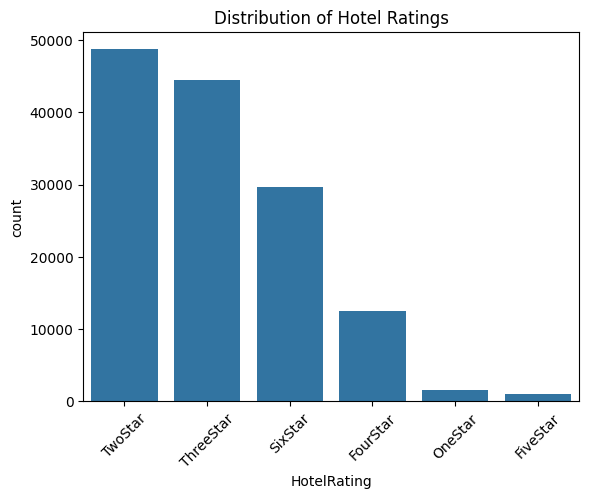

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='HotelRating', data=df, order=df['HotelRating'].value_counts().index)
plt.title("Distribution of Hotel Ratings")
plt.xticks(rotation=45)
plt.show()

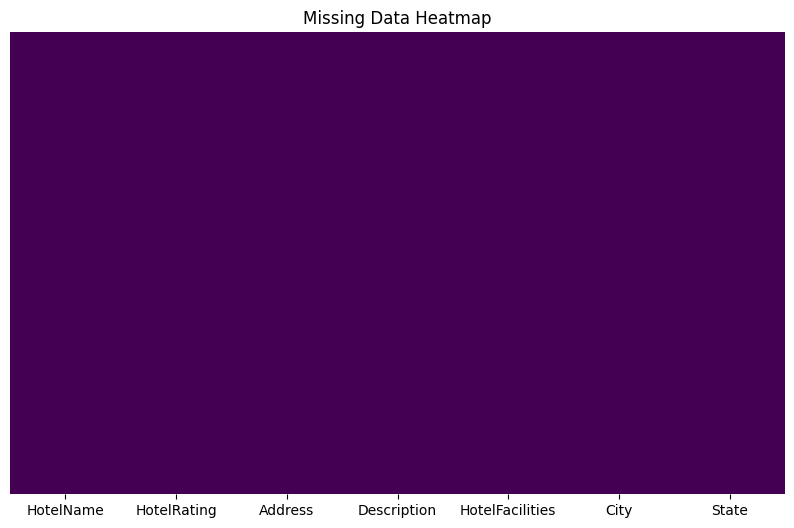

In [59]:
import seaborn as sns

# Plot missing values as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

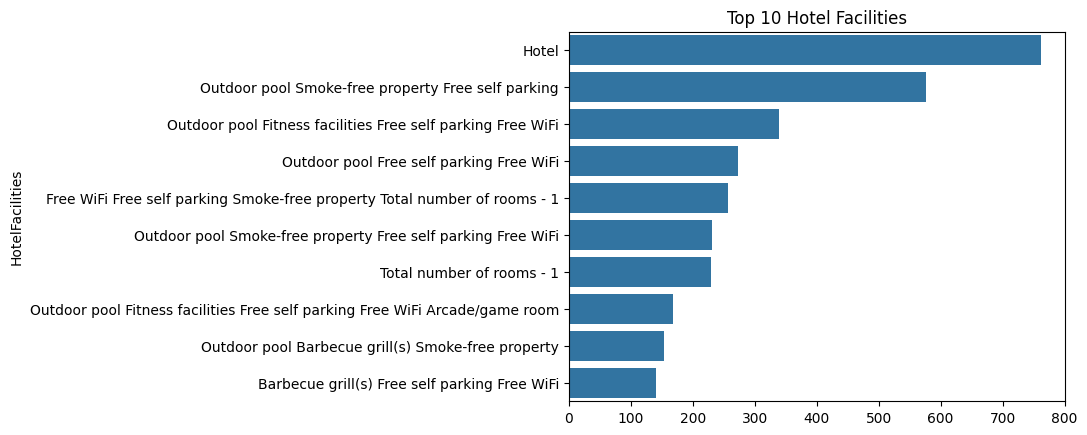

In [60]:
top_facilities = df['HotelFacilities'].str.split(',').explode().value_counts().head(10)

# Plot the top 10 hotel facilities
sns.barplot(x=top_facilities.values, y=top_facilities.index)
plt.title("Top 10 Hotel Facilities")
plt.show()

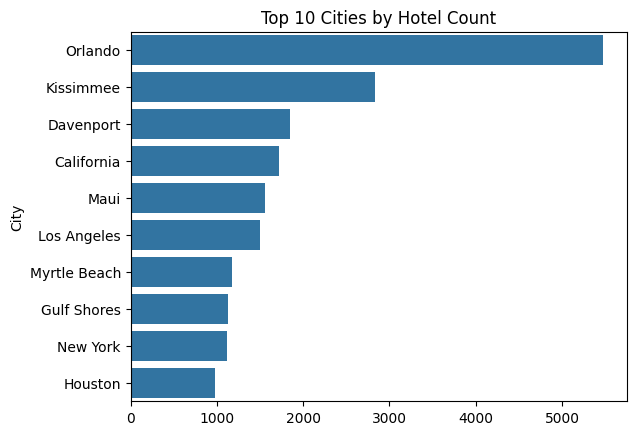

In [61]:
# Plot number of hotels per city
city_counts = df['City'].value_counts().head(10)  # Show top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title("Top 10 Cities by Hotel Count")
plt.show()

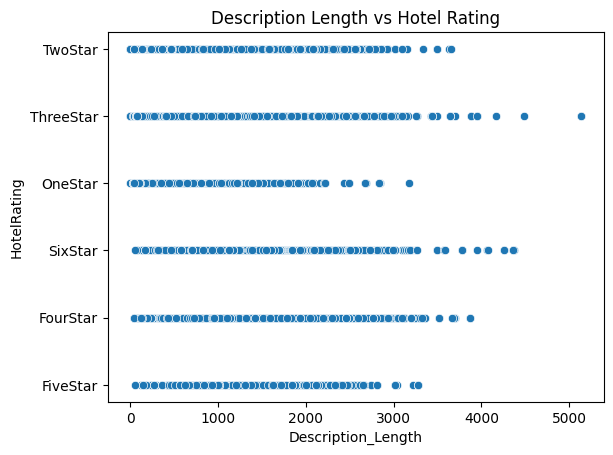

In [63]:
# Calculate the length of each description
df['Description_Length'] = df['Description'].apply(len)

# Plot scatter plot of description length vs rating
sns.scatterplot(x='Description_Length', y='HotelRating', data=df)
plt.title("Description Length vs Hotel Rating")
plt.show()


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137948 entries, 0 to 137947
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   HotelName           137948 non-null  object
 1   HotelRating         137948 non-null  object
 2   Address             137948 non-null  object
 3   Description         137948 non-null  object
 4   HotelFacilities     137948 non-null  object
 5   City                137948 non-null  object
 6   State               137948 non-null  object
 7   Description_Length  137948 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [65]:
# Strip leading/trailing whitespaces from the ratings
df['HotelRating'] = df['HotelRating'].str.strip()

# Re-check unique values after cleaning
print(df['HotelRating'].unique())

# Replace 'SixStar' and 'FiveStar' with 'FiveStar'
df['HotelRating'] = df['HotelRating'].replace({'SixStar': 'FiveStar'})

# Map the ratings to numeric values
rating_map = {
    'OneStar': 1,
    'TwoStar': 2,
    'ThreeStar': 3,
    'FourStar': 4,
    'FiveStar': 5
}

# Apply the map
df['HotelRating'] = df['HotelRating'].map(rating_map)

# Check if the mapping worked
print(df['HotelRating'].value_counts())


['TwoStar' 'ThreeStar' 'OneStar' 'SixStar' 'FourStar' 'FiveStar']
HotelRating
2    48674
3    44408
5    30727
4    12550
1     1589
Name: count, dtype: int64


In [66]:
import re

# Function to remove HTML tags and specific unwanted tags like <p>, <li>
def remove_html_tags(text):
    # Remove all HTML tags (including <p>, <li>, etc.)
    return re.sub(r'<[^>]+>', '', text)

# Function to normalize text: convert to lowercase
def normalize_text(text):
    return text.lower()  # Convert text to lowercase

# Clean the 'Description' column (remove HTML tags)
df['Description_cleaned'] = df['Description'].apply(remove_html_tags)

# Clean the 'HotelFacilities' column (remove HTML tags)
df['HotelFacilities_cleaned'] = df['HotelFacilities'].apply(remove_html_tags)

# Normalize both columns (to lowercase)
df['Description_cleaned'] = df['Description_cleaned'].apply(normalize_text)
df['HotelFacilities_cleaned'] = df['HotelFacilities_cleaned'].apply(normalize_text)

# Check the cleaned columns
df[['Description_cleaned', 'HotelFacilities_cleaned']].head()


,Description_cleaned,HotelFacilities_cleaned
0,sunbelt lodge motel is a 2-star property situa...,shared lounge/tv area meeting/banquet faciliti...
1,offering a free continental breakfast and an o...,24-hour front desk non-smoking rooms laundry f...
2,headline : near abbeville general hospitalloca...,wheelchair accessible (may have limitations) v...
3,headline : near abbeville general hospitalloca...,wheelchair accessible (may have limitations) w...
4,headline : near abbeville general hospitalloca...,express check-out multilingual staff 24-hour f...


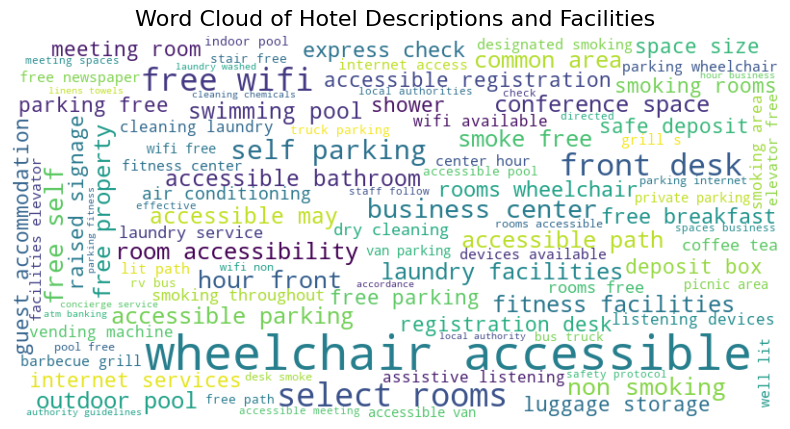

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Rename the columns for clarity
df.rename(columns={'Description_cleaned': 'Description', 'HotelFacilities_cleaned': 'Facilities'}, inplace=True)

# Combine the 'Description' and 'Facilities' columns into one large string (for word cloud)
combined_text = ' '.join(df['Description'].dropna()) + ' ' + ' '.join(df['Facilities'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Don't show axis
plt.title('Word Cloud of Hotel Descriptions and Facilities', fontsize=16)
plt.show()


In [68]:
df

,HotelName,HotelRating,Address,Description,HotelFacilities,City,State,Description_Length,Description,Facilities
0,Sunbelt Lodge Motel,2,1903 Veterans Memorial Drive AbbevilleLouisian...,Sunbelt Lodge Motel is a 2-star property situa...,shared lounge/TV area meeting/banquet faciliti...,Abbeville,Louisiana,755,sunbelt lodge motel is a 2-star property situa...,shared lounge/tv area meeting/banquet faciliti...
1,Budget Inn & Suites,2,2115 Charity Street AbbevilleLouisiana 70510,Offering a free continental breakfast and an o...,24-hour front desk Non-smoking rooms Laundry F...,Abbeville,Louisiana,1046,offering a free continental breakfast and an o...,24-hour front desk non-smoking rooms laundry f...
2,Best Western Abbeville Inn & Suites,2,3515 Veterans Memorial Dr Abbeville AbbevilleL...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) V...,Abbeville,Louisiana,1364,headline : near abbeville general hospitalloca...,wheelchair accessible (may have limitations) v...
3,Motel 6 Abbeville LA,2,3523 Veterans Memorial Drive AbbevilleLouisian...,<p>HeadLine : Near Abbeville General Hospital<...,Wheelchair accessible (may have limitations) W...,Abbeville,Louisiana,1636,headline : near abbeville general hospitalloca...,wheelchair accessible (may have limitations) w...
4,Days Inn by Wyndham Abbeville,2,730 Veterans Memorial Dr AbbevilleLouisiana 70...,<p>HeadLine : Near Abbeville General Hospital<...,Express check-out Multilingual staff 24-hour f...,Abbeville,Louisiana,1411,headline : near abbeville general hospitalloca...,express check-out multilingual staff 24-hour f...
...,...,...,...,...,...,...,...,...,...,...
137943,Country Inn & Suites by Radisson Zion IL,2,1100 33Rd Street Zion 60099 ZionIllinois 60099,<p>HeadLine : Near Illinois Beach State Park</...,Dry cleaning/laundry service Wheelchair access...,Zion,Illinois,2307,headline : near illinois beach state parklocat...,dry cleaning/laundry service wheelchair access...
137944,The Inn at Market Square,3,2723 Sheridan Road ZionIllinois 60099,<p>HeadLine : Near Cancer Treatment Centers of...,Gift shops or newsstand Shopping on site Propo...,Zion,Illinois,1836,headline : near cancer treatment centers of am...,gift shops or newsstand shopping on site propo...
137945,Best Western Plus Crossroads Inn & Suites,2,135 Wood Ridge Ter Zion Crossroads Zion Crossr...,<p>HeadLine : Near Spring Creek Golf Club</p><...,Daily Safe-deposit box at front desk Smoke-fre...,Zion Crossroads,Virginia,1377,headline : near spring creek golf clublocation...,daily safe-deposit box at front desk smoke-fre...
137946,Zion Ponderosa Ranch Resort,2,Twin Knolls Road Zion National Park Orderville...,<p>HeadLine : Near Clear Creek Overlook</p><p>...,Mountain biking on site ATM/banking Terrace Zi...,Zion National Park,Utah,1577,headline : near clear creek overlooklocation :...,mountain biking on site atm/banking terrace zi...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137948 entries, 0 to 137947
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   HotelName           137948 non-null  object
 1   HotelRating         137948 non-null  int64 
 2   Address             137948 non-null  object
 3   Description         137948 non-null  object
 4   HotelFacilities     137948 non-null  object
 5   City                137948 non-null  object
 6   State               137948 non-null  object
 7   Description_Length  137948 non-null  int64 
 8   Description         137948 non-null  object
 9   Facilities          137948 non-null  object
dtypes: int64(2), object(8)
memory usage: 10.5+ MB


In [71]:
# Remove unnecessary columns
df.drop(columns=['Description_Length', 'HotelFacilities', 'Description'], inplace=True)

# Check the cleaned dataframe structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137948 entries, 0 to 137947
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HotelName    137948 non-null  object
 1   HotelRating  137948 non-null  int64 
 2   Address      137948 non-null  object
 3   City         137948 non-null  object
 4   State        137948 non-null  object
 5   Facilities   137948 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.3+ MB


In [72]:
print(df.isnull().sum())


HotelName      0
HotelRating    0
Address        0
City           0
State          0
Facilities     0
dtype: int64


In [73]:
print(df['HotelRating'].unique())  # Check unique values
print(df['HotelRating'].describe())  # Get a summary of the numerical data

[2 3 1 5 4]
count    137948.000000
mean          3.160582
std           1.164084
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: HotelRating, dtype: float64


In [74]:
# Check if there are any odd characters in the 'Facilities' column
df['Facilities'].apply(lambda x: [char for char in x if not char.isalnum() and char != ' ']).head()


0                    [/, /, (, ), -, /, (, ), /, -, -]
1                             [-, -, /, /, (, ), (, )]
2                 [(, ), -, -, -, -, -, -, (, ), (, )]
3    [(, ), -, -, -, -, -, -, (, ), -, (, ), -, -, ...
4        [-, -, -, /, -, -, -, -, (, ), -, (, ), (, )]
Name: Facilities, dtype: object

In [75]:
print(df.dtypes)

HotelName      object
HotelRating     int64
Address        object
City           object
State          object
Facilities     object
dtype: object


In [76]:
import re

# Function to clean the 'Facilities' column
def clean_facilities(facilities_text):
    # Remove unwanted characters (e.g., slashes, parentheses, hyphens, etc.)
    cleaned_text = re.sub(r'[^\w\s]', '', facilities_text)  # Removes non-alphanumeric characters
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    return cleaned_text

# Apply the cleaning function
df['Facilities'] = df['Facilities'].apply(clean_facilities)

# Check the cleaned 'Facilities' column
print(df['Facilities'].head())


0    shared loungetv area meetingbanquet facilities...
1    24hour front desk nonsmoking rooms laundry fre...
2    wheelchair accessible may have limitations ven...
3    wheelchair accessible may have limitations whe...
4    express checkout multilingual staff 24hour fro...
Name: Facilities, dtype: object


In [77]:
df.head()

,HotelName,HotelRating,Address,City,State,Facilities
0,Sunbelt Lodge Motel,2,1903 Veterans Memorial Drive AbbevilleLouisian...,Abbeville,Louisiana,shared loungetv area meetingbanquet facilities...
1,Budget Inn & Suites,2,2115 Charity Street AbbevilleLouisiana 70510,Abbeville,Louisiana,24hour front desk nonsmoking rooms laundry fre...
2,Best Western Abbeville Inn & Suites,2,3515 Veterans Memorial Dr Abbeville AbbevilleL...,Abbeville,Louisiana,wheelchair accessible may have limitations ven...
3,Motel 6 Abbeville LA,2,3523 Veterans Memorial Drive AbbevilleLouisian...,Abbeville,Louisiana,wheelchair accessible may have limitations whe...
4,Days Inn by Wyndham Abbeville,2,730 Veterans Memorial Dr AbbevilleLouisiana 70...,Abbeville,Louisiana,express checkout multilingual staff 24hour fro...


In [78]:
df.to_csv('US_Hotel_DB.csv', index=False)